In [149]:
import cv2

In [150]:
image = cv2.imread('sascha.jpg') #wczytywanie zdjecia

In [151]:
resized = cv2.resize(image, (224,224)) #przekształcanie rozmiaru zdjecia

In [152]:
import matplotlib.pyplot as plt

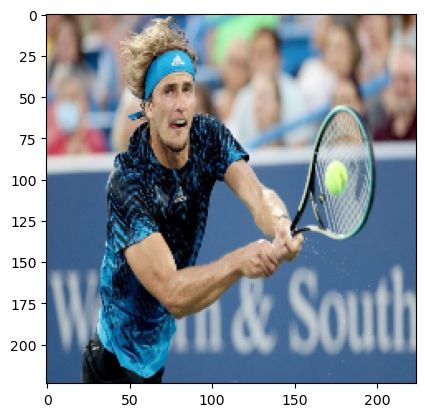

In [153]:
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)) #wyswietlanie rgb resizowanego zdjecia

In [154]:
normalized = resized / 255.0 #normalizacja zdjęcia [0,1]

In [155]:
grayscale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY) #skala szarości

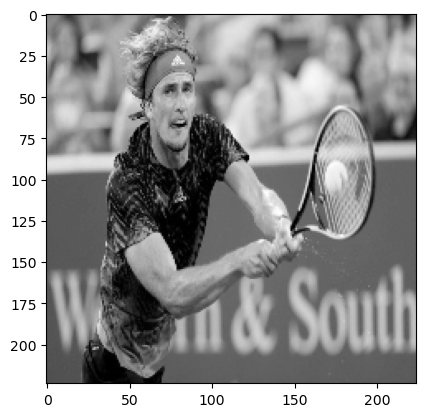

In [156]:
plt.imshow(grayscale, cmap='gray') #wyświetlanie zdjecia w skali szarosci

In [157]:
rgb = cv2.cvtColor(grayscale, cv2.COLOR_GRAY2BGR) #mobilenetv2 przyjmuje obrazy w formacie RGB, dlatego wracamy do rgb

In [158]:
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [159]:
image = np.expand_dims(rgb,axis=0) #rozszerzamy zdjecie do odpowiedniego formaty, ,obilenetv2 przyjmuje 224,224 ale zdjecie resizowane ma 32,224
image = preprocess_input(image) #preprocessing


In [160]:
import tensorflow as tf
from transformers import MobileNetV2Config, MobileNetV2Model
from tensorflow.keras.applications import MobileNetV2

In [161]:
model = MobileNetV2(weights='imagenet') #ładowanie modelu

In [162]:
predictions = model.predict(image) 
top5 = decode_predictions(predictions, top=5)[0] #przewidywanie

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


In [163]:
for i, (label) in enumerate(top5): 
    print(f"{i+1}: {label}")
#wyswietlanie 5 najlepszych przypisanych klas

1: ('n04039381', 'racket', 0.69983304)
2: ('n09229709', 'bubble', 0.06330679)
3: ('n04409515', 'tennis_ball', 0.02783279)
4: ('n03633091', 'ladle', 0.024217501)
5: ('n04332243', 'strainer', 0.012133535)
